<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/homework/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1

##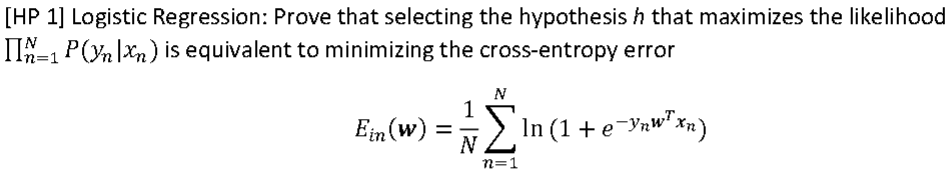

Given that h maximizes the likelihood that  $w^{T}x$ has the same sign as y, that means that for g=$-y_{n}$$w^{T}$$x_{n}$ in each ln(1+$e^{g}$), h has the most likelihood for $w^{T}x$ to have the same sign as y.

This means that in the summation, an instance of g is more likely to be a negative value, since -1 times two values of the same sign always produces a negative value, which makes ln(1+$e^{g}$) close to zero.

Therefore, when h maximizes the probability of $w^{T}x$ and y having the same sign, it maximizes the amount of values in the summation that are close to zero, which is another way of saying it minimises the value of the whole summation.

Thus, a hypothesis h that maximizes the likelihood is equivalent to said hypothesis h minimizing the cross-entropy error.

##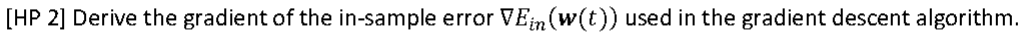

Since the derivative of a summation can be considered as a summation of the derivative of the inner term, we can simply get the derivative of the inner term and place the end result in a summation.

By substituting z=$-y_{n}$$w^{T}$$x_{n}$, for the inside term, we get ln(1+$e^{z}$), the derivative of which is z'$e^{z}$/(1+$e^{z}$).

Thus we need to get the derivative of z in terms of $w_{i}$, which is:

d/d$w_{i}$ of z = -$y_{n}$$x_{n,i}$

therefore the final answer is:

dE/d$w_{i}$ = -1/N$\sum_{i=1}^n y_{n}$$x_{n,i} * ln(e^{z}/(1+e^{z}))$

with z = -$y_{n}w^{T}x_{n}$

#Task 2

##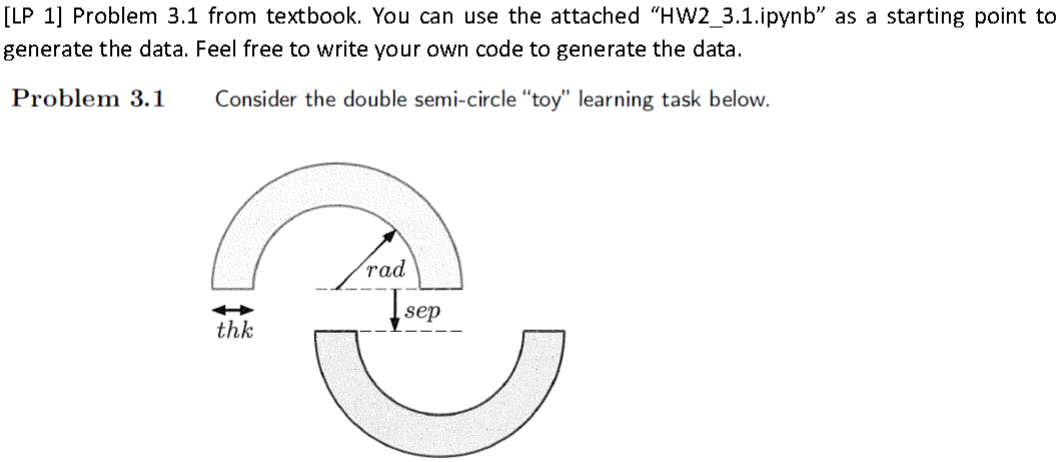

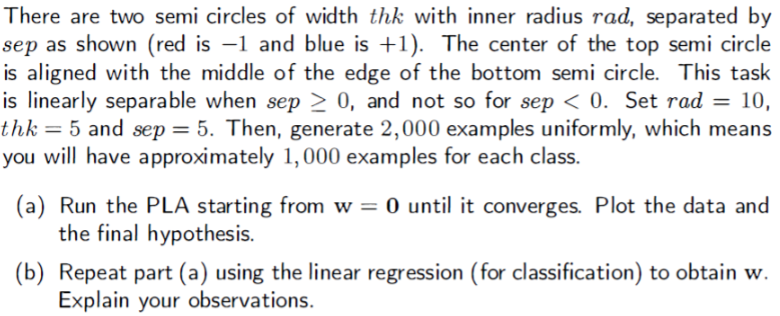

###Data Generation

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#### CREDITS: Wencen Wu ####
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    #Y = 1 : top, Y = -1 : bottom
    x1 = []
    x2 = []
    Y = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                x1.append(X1 + x)
                x2.append(Y1+y)
                Y.append(1)
                cnt += 1
            else:
                x1.append(X2 + x)
                x2.append(Y2 + y)
                Y.append(-1)
                cnt += 1
        else:
            continue

    data = [np.array([1, x1[i], x2[i], Y[i]]) for i in range(n)]
    return data

In [3]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

###Functions (a)

In [4]:
def getSign(x):
  if x < 0:
    return -1
  if x >= 0:
    return 1

def getDot(w, i, df):
  ans = w[0] + w[1]*df.x1[i] + w[2]*df.x2[i]
  return ans

def adjustWeights(w, i, df, n, s):
  yAdj = n*(df.y[i] - s)
  w2 = [w[0] + yAdj, w[1] + df.x1[i]*yAdj, w[2] + df.x2[i]*yAdj]
  return w2

def PLA(df, n):
  w = [1,0,0]
  accurate = False
  updates = 0
  while not accurate and updates < 2000 :
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    s = getDot(w, i, df)
    if s*df.y[i] <= 0:
      w = adjustWeights(w, i, df, n, s)
    for i in range(0, df.shape[0]):
      s = getDot(w, i, df)
      if s*df.y[i] <= 0:
        accurate = False
        break
  return w

###Implementation (a)

In [5]:
#parameters
rad = 10
thk = 5
sep = 5
df = pd.DataFrame(generatedata(rad,thk,sep,2000))
df.columns = ['index', 'x1', 'x2', 'y']
n = 0.01
w = PLA(df, n)

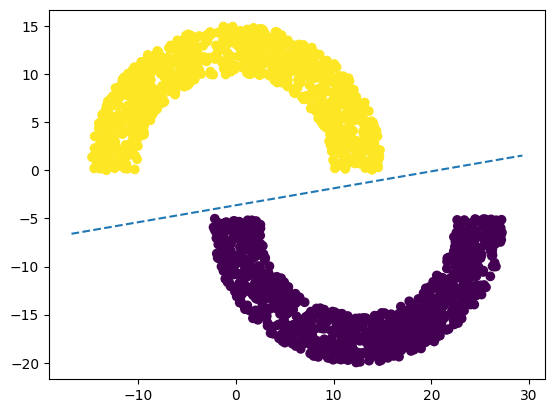

In [6]:
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
abline((-w[1]/w[2]), (-w[0]/w[2]))

###Functions (b)

In [6]:
def LinReg(df):
  x = np.array([[1]*len(df.x1), df.x1, df.x2])
  y = np.array([df.y])
  # w = ((x^T*x)^-1*x^T)*y
  w = np.dot(np.dot(np.linalg.inv(np.dot(x, np.transpose(x))), x), np.transpose(y))
  return w

###Implementation (b)

In [7]:
#parameters
rad = 10
thk = 5
sep = 5
df = pd.DataFrame(generatedata(rad,thk,sep,2000))
df.columns = ['index', 'x1', 'x2', 'y']
w = LinReg(df)

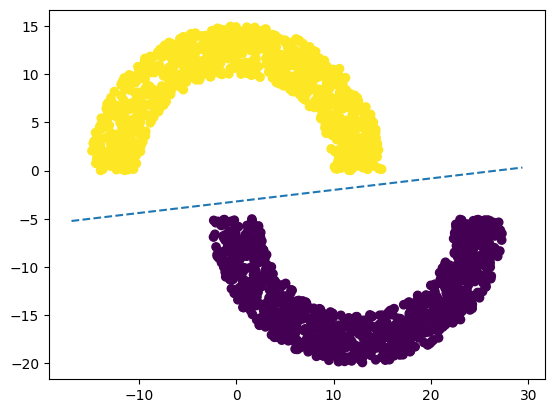

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
abline((-w[1]/w[2]), (-w[0]/w[2]))

###Observations

Due to the random sampling nature of the PLA Algorithm, each time it is run it returns a different, but similarly correct hypothesis h.

On the other hand, because linear regression uses the entire dataset in the exact same way every time it is run, it will always return the exact same solution when the same dataset is run again.

Even if the dataset is regenerated, so long as the dataset is overall still the same the solution will be nearly indistinguishable from the last

##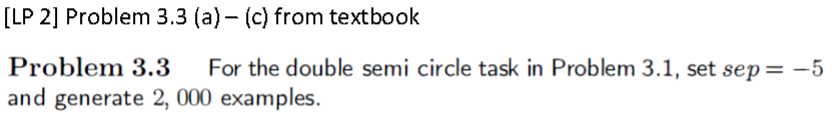

In [8]:
#parameters
rad = 10
thk = 5
sep = -5
df = pd.DataFrame(generatedata(rad,thk,sep,2000))
df.columns = ['bias', 'x1', 'x2', 'y']

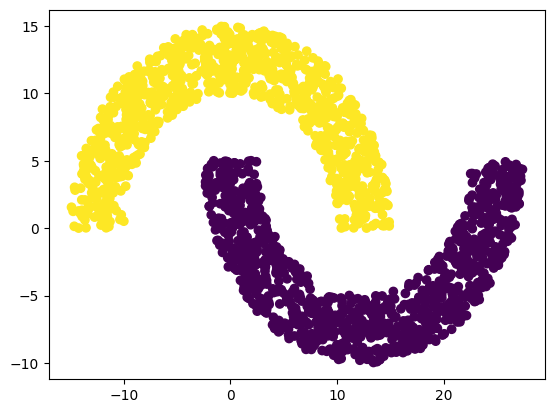

In [11]:
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)

###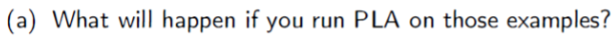

Because of the overlap, no true solution exists, so it can only return a line that separates most of the dataset, as a line that separates all of it would have to be curved.

###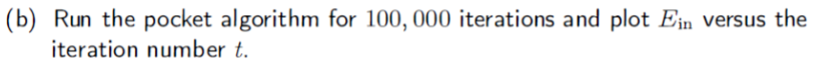

In [9]:
def adjustWeights(w, i, df):
  w2 = [w[0] + df.y[i], w[1] + df.x1[i]*df.y[i], w[2] + df.x2[i]*df.y[i]]
  return w2

def PocketAlg(df, n):
  w = [1,0,0]
  wFin = [1,0,0]
  error = []
  accurate = False

  iterations = 0
  mistakes = 0
  minMistakes = df.shape[0]

  while not accurate and iterations < n:
    iterations += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    if getSign(getDot(w, i, df)) != df.y[i]:
      w = adjustWeights(w, i, df)
    for i in range(0, df.shape[0]):
      if getSign(getDot(w, i, df)) != df.y[i]:
        accurate = False
        mistakes+=1
    error.append(mistakes/len(df.x1))
    if mistakes < minMistakes:
      minMistakes = mistakes
      wFin = w.copy()
    mistakes = 0
  return wFin, error

In [17]:
n = 100000
w, eIn = PocketAlg(df, n)

###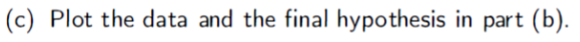

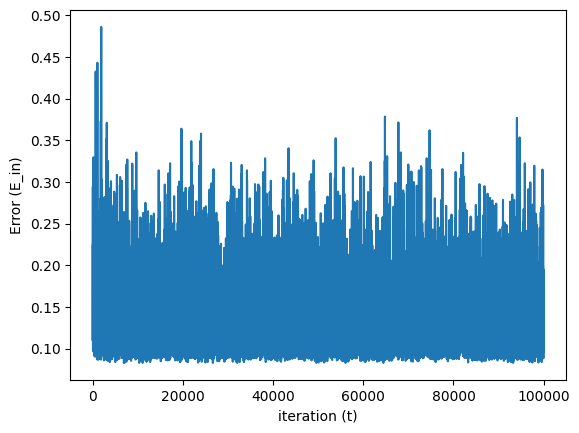

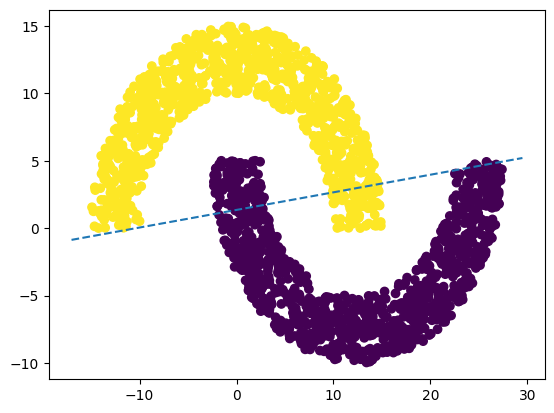

In [18]:
iter = [i for i in range(len(eIn))]
plt.plot(iter, eIn)
plt.xlabel("iteration (t)")
plt.ylabel("Error (E_in)")
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
abline((-w[1]/w[2]), (-w[0]/w[2]))

##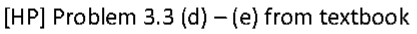

###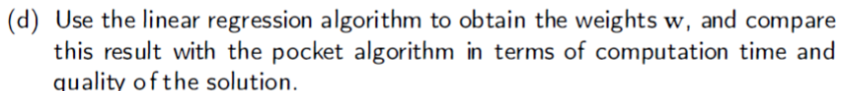

In [19]:
wLin = LinReg(df)

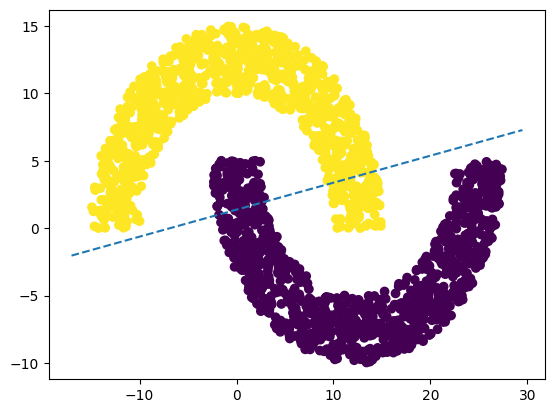

In [20]:
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
abline((-wLin[1]/wLin[2]), (-wLin[0]/wLin[2]))

Comparing the results, the lines are near identical, with an approximately equal amount of each class being correctly classified. In terms of computation time, the pocket algorithm took about 15 minutes, and the linear regression took about a third of a second, making it the clearly superior choice in this case.

###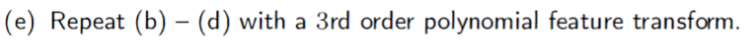

In [10]:
df['x1x2'] = np.array(df.x1)*np.array(df.x2)
df['x1^2'] = np.array(df.x1) ** 2
df['x2^2'] = np.array(df.x2) ** 2
df['x1x2^2'] = np.array(df.x1)*np.array(df.x2)*np.array(df.x2)
df['x1^2x2'] = np.array(df.x1)*np.array(df.x1)*np.array(df.x2)
df['x1^3'] = np.array(df.x1) ** 3
df['x2^3'] = np.array(df.x2) ** 3
df.columns

Index(['bias', 'x1', 'x2', 'y', 'x1x2', 'x1^2', 'x2^2', 'x1x2^2', 'x1^2x2',
       'x1^3', 'x2^3'],
      dtype='object')

In [11]:
def getDot3rd(w,i,df):
  ans = np.sum(np.array(w)*np.array(df[['bias', 'x1', 'x2', 'x1x2', 'x1^2', 'x2^2', 'x1x2^2', 'x1^2x2', 'x1^3', 'x2^3']].iloc[i]))
  return ans

def adjustWeights3rd(w,i,df):
  out = np.array(w) + np.array(df[['bias', 'x1', 'x2', 'x1x2', 'x1^2', 'x2^2', 'x1x2^2', 'x1^2x2', 'x1^3', 'x2^3']].iloc[i])*np.array(df.y[i])
  return out

def PocketAlg3rd(df, iter):
  w = [0]*10
  wFin = [0]*10
  error = []
  accurate = False

  iterations = 0
  mistakes = 0
  minMistakes = df.shape[0]
  count = 0
  while not accurate and iterations < iter:
    if iterations == (iter/10)*count:
      print(count*10, '%')
      count+=1
    iterations += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    if getSign(getDot3rd(w, i, df)) != df.y[i]:
      w = adjustWeights3rd(w, i, df)
    for i in range(0, df.shape[0]):
      if getSign(getDot3rd(w, i, df)) != df.y[i]:
        accurate = False
        mistakes+=1
    error.append(mistakes/len(df.x1))
    if mistakes < minMistakes:
      minMistakes = mistakes
      wFin = w.copy()
    mistakes = 0
  return wFin, error

####(b)

In [12]:
iterations = 1000
w3rd, error3rd = PocketAlg3rd(df, iterations)

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


####(c)

In [25]:
def plot4poly(w0,w1,w2,w3,w4,w5,w6,w7,w8,w9, color='red'):
  axes = plt.gca()
  xlims = axes.get_xlim()
  ylims = axes.get_ylim()
  x1 = np.linspace(xlims[0], xlims[1], 1000)
  x2 = np.linspace(ylims[0], ylims[1], 1000)
  # meshgrid
  XM1, XM2 = np.meshgrid(x1, x2)
  #['bias', 'x1', 'x2', 'x1x2', 'x1^2', 'x2^2', 'x1x2^2', 'x1^2x2', 'x1^3', 'x2^3']
  def f(x1, x2, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9):
    return w0 + w1*(x1) + w2*(x2) + w3*(x1*x2) + w4*(x1**2) + w5*(x2**2) + w6*(x1*x2**2) + w7*(x1**2*x2) + w8*(x1**3) + w9*(x2**3)
  plt.contour(XM1, XM2, f(XM1, XM2, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9), 1, colors = color)

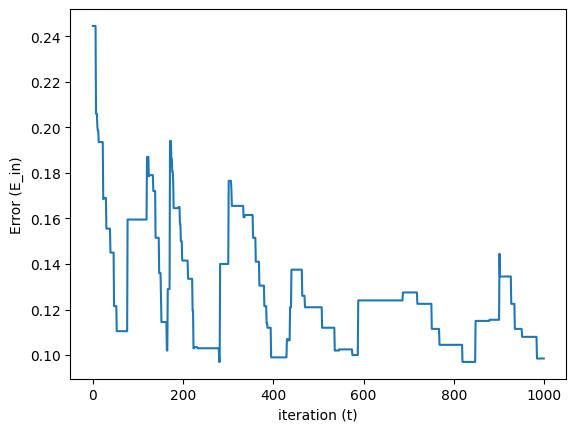

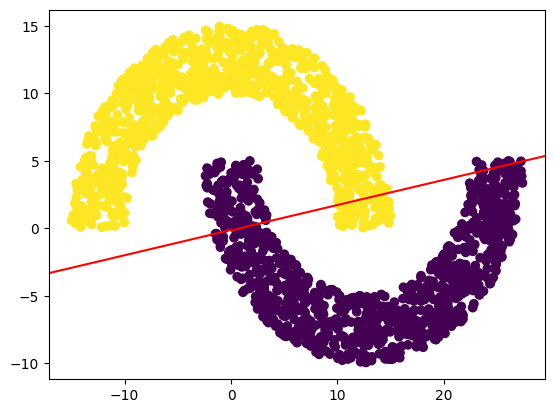

In [27]:
iter = [i for i in range(len(error3rd))]
plt.plot(iter, error3rd)
plt.xlabel("iteration (t)")
plt.ylabel("Error (E_in)")
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
x_min, x_max = df.x1.min() - .5, df.x1.max() + .5
y_min, y_max = df.x2.min() - .5, df.x2.max() + .5
plot4poly(w3rd[0],w3rd[1],w3rd[2],w3rd[3],w3rd[4],w3rd[5],w3rd[6],w3rd[7],w3rd[8],w3rd[9])

####(d)

In [30]:
def LinReg(df):
  #['bias', 'x1', 'x2', 'x1x2', 'x1^2', 'x2^2', 'x1x2^2', 'x1^2x2', 'x1^3', 'x2^3']
  x = np.array([[1]*len(df.x1), df.x1, df.x2, df.x1x2, df['x1^2'], df['x2^2'], df['x1x2^2'], df['x1^2x2'], df['x1^3'], df['x2^3']])
  y = np.array([df.y])
  w = np.dot(np.dot(np.linalg.inv(np.dot(x, np.transpose(x))), x), np.transpose(y))
  return w

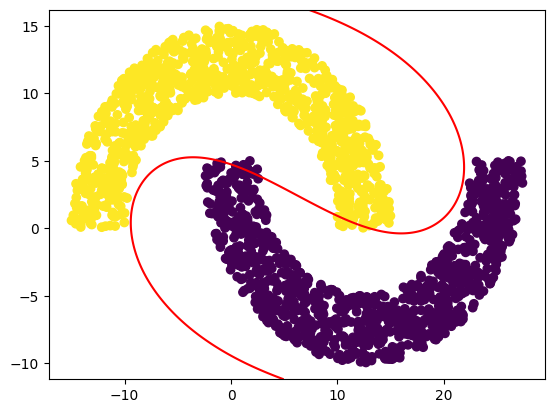

In [31]:
wLin3rd = LinReg(df)
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
x_min, x_max = df.x1.min() - .5, df.x1.max() + .5
y_min, y_max = df.x2.min() - .5, df.x2.max() + .5
plot4poly(wLin3rd[0],wLin3rd[1],wLin3rd[2],wLin3rd[3],wLin3rd[4],wLin3rd[5],wLin3rd[6],wLin3rd[7],wLin3rd[8],wLin3rd[9])

#Task 3

##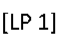

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ZipDigits/ZipDigits.train', header=None, delimiter=' ')
df_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ZipDigits/ZipDigits.test', header=None, delimiter=' ')
include = [1, 5]
df_train = df_train.loc[df_train[0].isin(include)]
df_test = df_test.loc[df_test[0].isin(include)]

In [34]:
df_train[0] = df_train[0].replace(5, -1)
df_test[0] = df_test[0].replace(5, -1)
df_train = df_train.drop(257, axis=1)
df_test = df_test.drop(257, axis=1)

In [35]:
def symmCalc(row):
  image = np.array(row[1:257]).reshape(16,16)
  left = image[:,:8]
  right = np.fliplr(image[:,8:16])
  symmDiff = np.abs(left-right)
  return (np.sum(symmDiff)/(16*8))

In [36]:
df_train_alt = df_train.copy()
df_test_alt = df_test.copy()
df_train_alt['intensity'] = df_train.mean(axis=1)
df_test_alt['intensity'] = df_test.mean(axis=1)

df_train_alt['symmetry'] = df_train.apply(symmCalc, axis=1)
df_test_alt['symmetry'] = df_test.apply(symmCalc, axis=1)

###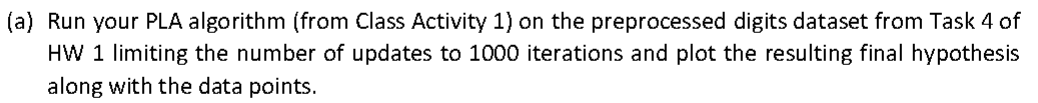

In [80]:
def ZDgetDot(w, i, df):
  ans = np.sum(np.array(w)*np.array(df[['bias', 'intensity','symmetry']].iloc[i]))
  return ans

def ZDadjustWeights(w, i, df, n, s):
  yAdj = n*(df[0].iloc[i] - s)
  w2 = np.array(w) + np.array(df[['bias', 'intensity','symmetry']].iloc[i])*yAdj
  return w2

def zdPLA(df, n):
  w = [0,0,0]
  accurate = False
  updates = 0
  mistakes = 0
  error = 1
  while not accurate and updates < 1000 :
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    s = ZDgetDot(w, i, df)
    if s*df[0].iloc[i] <= 0:
      w = ZDadjustWeights(w, i, df, n, s)
    mistakes = 0
    for i in range(0, df.shape[0]):
      s = ZDgetDot(w, i, df)
      if s*df[0].iloc[i] <= 0:
        mistakes += 1
        accurate = False
    if mistakes/df[0].shape[0] < error:
      error = mistakes/df[0].shape[0]
  return w, error

In [63]:
df_train_alt['bias'] = 1
df_train_alt.head(1)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,intensity,symmetry,bias
1,-1.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,-0.115195,0.533727,1


In [89]:
n = 0.01
wPLA, errorPLA = zdPLA(df_train_alt, n)

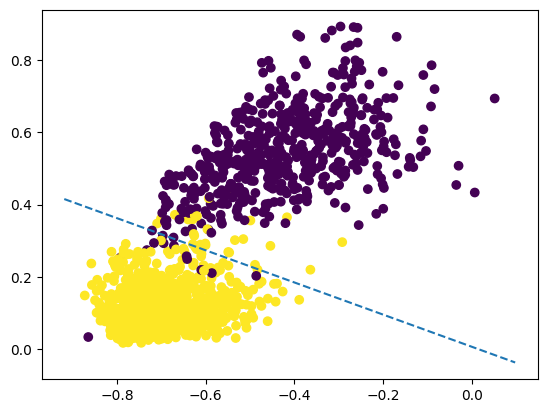

In [90]:
fig, ax = plt.subplots()
ax.scatter(df_train_alt['intensity'], df_train_alt['symmetry'], c=df_train_alt[0])
abline((-wPLA[1]/wPLA[2]), (-wPLA[0]/wPLA[2]))

###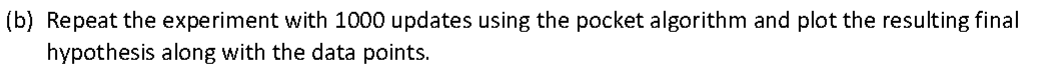

In [111]:
def ZDPadjustWeights(w, i, df):
  w2 = np.array(w) + np.array(df[['bias', 'intensity','symmetry']].iloc[i])*df[0].iloc[i]
  return w2

def ZDPocketAlg(df, iter):
  w = [0,0,0]
  wFin = [0,0,0]
  accurate = False

  iterations = 0
  error = 1
  mistakes = 0
  count = 0
  while not accurate and iterations < iter:
    if iterations == (iter/10)*count:
      print(count*10, '%')
      count+=1
    iterations += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    if getSign(ZDgetDot(w, i, df)) != df[0].iloc[i]:
      w = ZDPadjustWeights(w, i, df)
    mistakes=0
    for i in range(0, df.shape[0]):
      if getSign(ZDgetDot(w, i, df)) != df[0].iloc[i]:
        accurate = False
        mistakes+=1
    errorVal = (mistakes/df[0].shape[0])
    if error > errorVal:
      error = mistakes/df[0].shape[0]
      wFin = w.copy()
  return wFin, error

In [112]:
wPock, errorPock = ZDPocketAlg(df_train_alt, 1000)

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


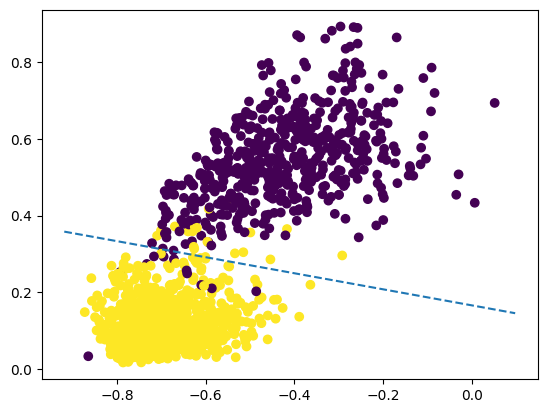

In [113]:
fig, ax = plt.subplots()
ax.scatter(df_train_alt['intensity'], df_train_alt['symmetry'], c=df_train_alt[0])
abline((-wPock[1]/wPock[2]), (-wPock[0]/wPock[2]))

###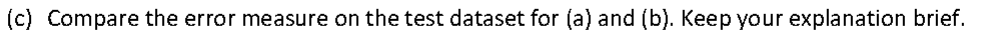

In [114]:
print('Error of PLA = ', errorPLA)
print('Error of Pocket = ', errorPock)

Error of PLA =  0.020499679692504803
Error of Pocket =  0.019218449711723255


The error of Pocket is lower since Pocket saves the best set of weights, while PLA saves the latest, which means it is vulnerable to overfitting, and may not necessarily be the best.

##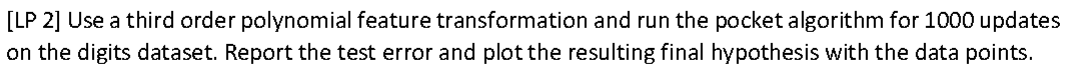

In [100]:
df_3rd = df_train_alt[[0, 'bias', 'intensity', 'symmetry']].copy()
df_3rd['is'] = np.array(df_3rd['intensity'])*np.array(df_3rd['symmetry'])
df_3rd['i^2'] = np.array(df_3rd['intensity']) ** 2
df_3rd['s^2'] = np.array(df_3rd['symmetry']) ** 2
df_3rd['is^2'] = np.array(df_3rd['intensity'])*np.array(df_3rd['symmetry'])*np.array(df_3rd['symmetry'])
df_3rd['i^2s'] = np.array(df_3rd['intensity'])*np.array(df_3rd['intensity'])*np.array(df_3rd['symmetry'])
df_3rd['i^3'] = np.array(df_3rd['intensity']) ** 3
df_3rd['s^3'] = np.array(df_3rd['symmetry']) ** 3
df_3rd.columns

Index([          0,      'bias', 'intensity',  'symmetry',        'is',
             'i^2',       's^2',      'is^2',      'i^2s',       'i^3',
             's^3'],
      dtype='object')

In [102]:
def getDot3rdZD(w,i,df):
  ans = np.sum(np.array(w)*np.array(df[['bias', 'intensity', 'symmetry', 'is', 'i^2', 's^2', 'is^2', 'i^2s', 'i^3', 's^3']].iloc[i]))
  return ans

def adjustWeights3rdZD(w,i,df):
  out = np.array(w) + np.array(df[['bias', 'intensity', 'symmetry', 'is', 'i^2', 's^2', 'is^2', 'i^2s', 'i^3', 's^3']].iloc[i])*np.array(df[0].iloc[i])
  return out

def PocketAlg3rdZD(df, iter):
  w = [0]*10
  wFin = [0]*10
  error = []
  accurate = False

  iterations = 0
  mistakes = 0
  minMistakes = df.shape[0]
  count = 0
  while not accurate and iterations < iter:
    if iterations == (iter/10)*count:
      print(count*10, '%')
      count+=1
    iterations += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    if getSign(getDot3rdZD(w, i, df)) != df[0].iloc[i]:
      w = adjustWeights3rdZD(w, i, df)
    for i in range(0, df.shape[0]):
      if getSign(getDot3rdZD(w, i, df)) != df[0].iloc[i]:
        accurate = False
        mistakes+=1
    error.append(mistakes/len(df[0]))
    if mistakes < minMistakes:
      minMistakes = mistakes
      wFin = w.copy()
    mistakes = 0
  return wFin, error

In [103]:
iterations = 1000
w3rdZD, error3rdZD = PocketAlg3rdZD(df_3rd, iterations)

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


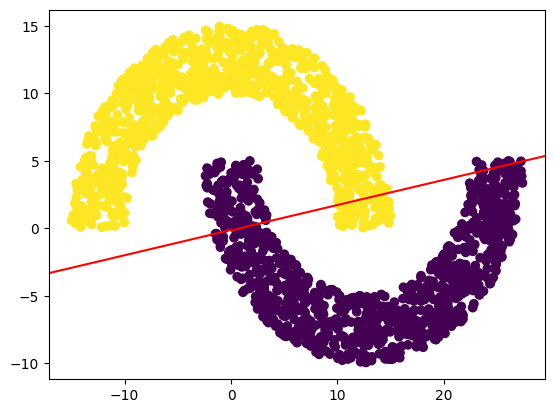

In [104]:
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
x_min, x_max = df.x1.min() - .5, df.x1.max() + .5
y_min, y_max = df.x2.min() - .5, df.x2.max() + .5
plot4poly(w3rd[0],w3rd[1],w3rd[2],w3rd[3],w3rd[4],w3rd[5],w3rd[6],w3rd[7],w3rd[8],w3rd[9])

#Task 4

##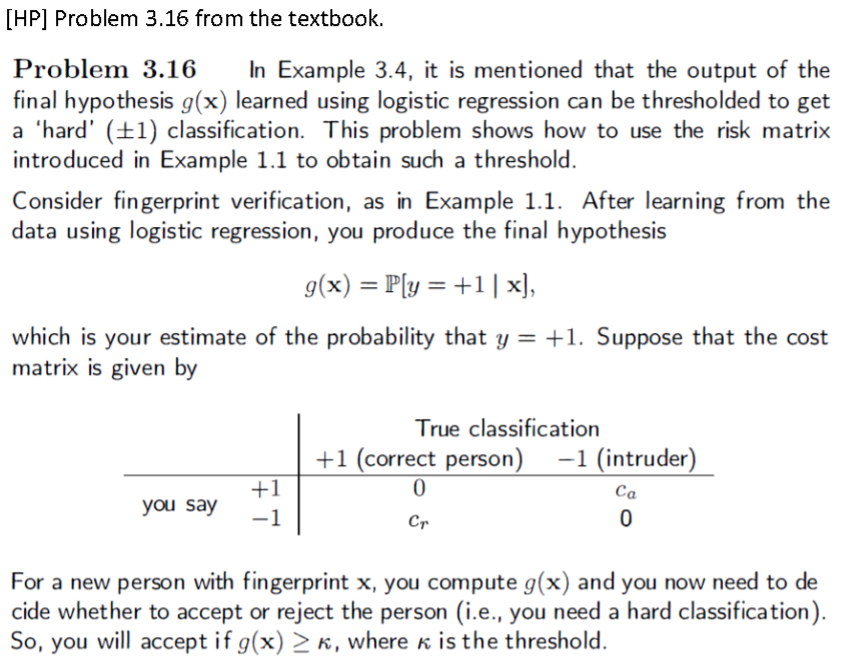

###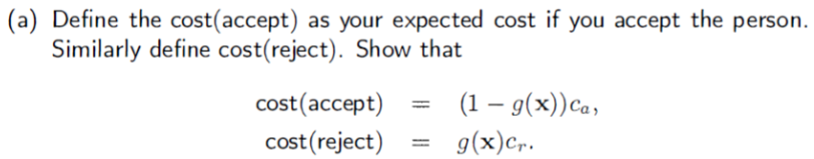

Given that g(x), we can say that the cost of authorizing is the sum of two parts. The first is g(x), the likelihood of them being legitimate, times the cost of accepting them, and the second is 1-g(x), the likelihood of them being an intruder, times the cost of rejecting them.

Going off the table, we can say that if we were to accept the person, the cost of accepting the correct person times the likelihood of them being the correct person, is g(x) \* (0), and the cost of accepting the intruder times the likelihood of them being the wrong person, is (1-g(x)) \* ($c_{a}$).

Therefore we can say:

cost(accept) = g(x) \* (0) + (1-g(x)) \* ($c_{a}$)

which simplifies to:

**cost(accept) = (1-g(x)) \* ($c_{a}$)**

Similarly, based on the table, we can say that if we were to reject the person, the cost of rejecting the correct person times the likelihood of them being the correct person, is g(x) \* ($c_{r}$), and the cost of rejecting the intruder times the likelihood of them being the wrong person, is (1-g(x)) \* (0).

Therefore we can say:

cost(reject) = g(x) \* ($c_{r}$) + (1-g(x)) \* (0)

which simplifies to:

**cost(reject) = g(x) \* ($c_{r}$)**

###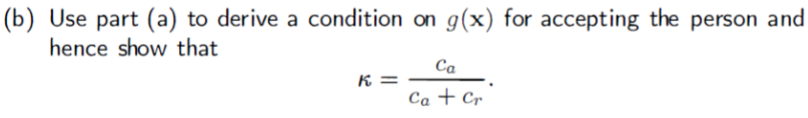

Given that g(x) >= k, we can substitue k into both equations, so we have:

cost(accept) = (1-k) \* ($c_{a}$) and

cost(reject) = k \* ($c_{r}$)

by setting the two equal to one another we get:

(1-k)($c_{a}$) = k($c_{r}$)

($c_{a}$) - k($c_{a}$) = k($c_{r}$)

k($c_{a}$ + $c_{r}$) = ($c_{a}$)

Thus:

k = ($c_{a}$) / ($c_{a}$ + $c_{r}$)

###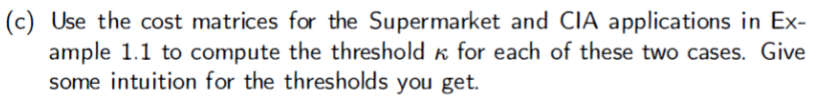

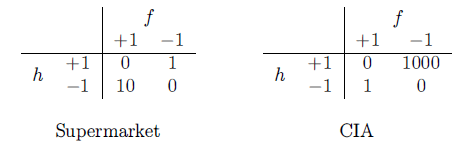

For the supermarket:

k = ($c_{a}$) / ($c_{a}$ + $c_{r}$)

k = 1/11

For the CIA:

k = ($c_{a}$) / ($c_{a}$ + $c_{r}$)

k = 1000/1001

The reasoning for this is as follows. The supermarket has a very low threshold, because the cost of accepting a non member is much lower than the cost of inadvertently rejecting a paying customer. On the other hand, given the importance of security in the CIA, the threshold required is near certainty that a person to be accepted is an agent and not an intruder, as its far better to accidentally lock out an agent than it is to let in an enemy intruder.